In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Exercise 1: Harris Corner Detection**

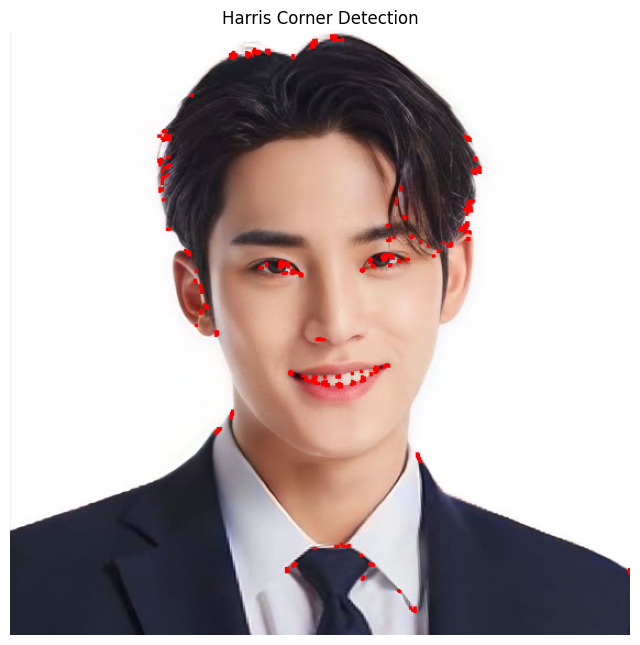

In [7]:
# Load an image of your choice.
image = cv2.imread('/content/mingyu.jpg')

# Convert it to grayscale.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Harris Corner Detection method to detect corners.
gray_image = np.float32(gray_image)
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Visualize the corners on the image and display the result.
dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

# **Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction**

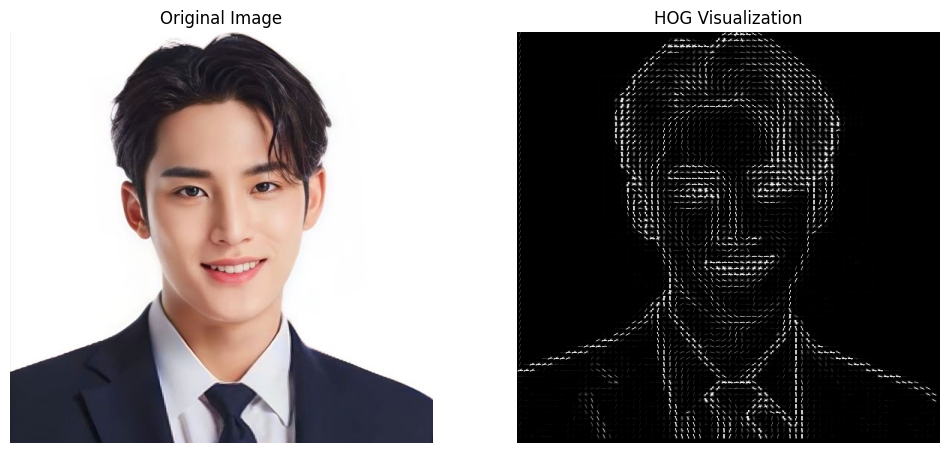

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load an image.
image = cv2.imread('mingyu.jpg')

# Convert the image to grayscale.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor to extract features.
hog_features, hog_image = hog(
    gray_image,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True
  )

# Visualize the keypoints on the image and display the result.
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')

plt.show()


# **Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection**

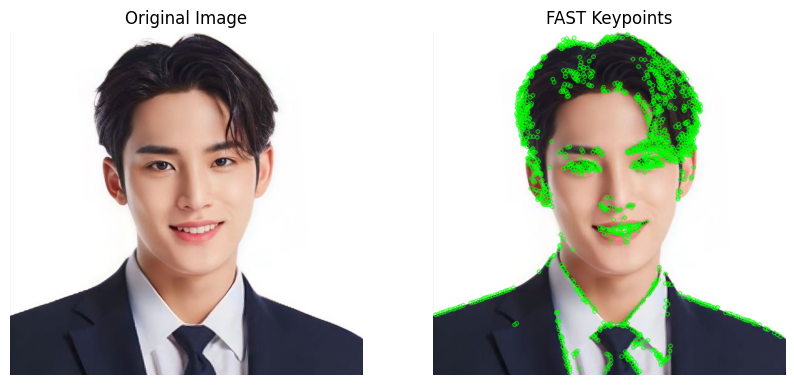

In [12]:
# Load an image.
image = cv2.imread('mingyu.jpg')

# Convert the image to grayscale.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the FAST algorithm to detect keypoints.
fast = cv2.FastFeatureDetector_create()

# Visualize the keypoints on the image and display the result.
keypoints = fast.detect(gray_image, None)

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints')
plt.axis('off')

plt.show()

# **Exercise 4: Feature Matching using ORB and FLANN**

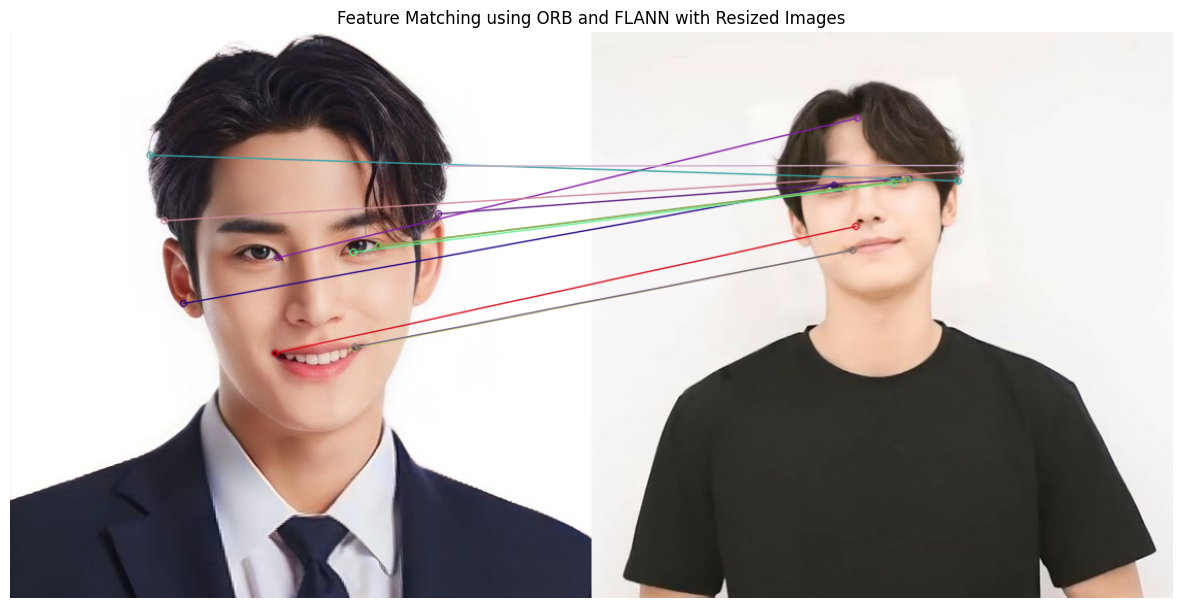

In [15]:
# Load two images of your choice.
image1 = cv2.imread('mingyu.jpg')
image2 = cv2.imread('dohyun.jpg')

height, width = image1.shape[:2]
image2 = cv2.resize(image2, (width, height))

gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Extract keypoints and descriptors using ORB.
orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

index_params = dict(algorithm=6,
                    table_number=6,
                    key_size=12,
                    multi_probe_level=1)
search_params = dict(checks=50)

# Match features between the two images using the FLANN matcher.
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched features.
plt.figure(figsize=(15, 8))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching using ORB and FLANN with Resized Images')
plt.axis('off')
plt.show()

# **Exercise 5: Image Segmentation using Watershed Algorithm**

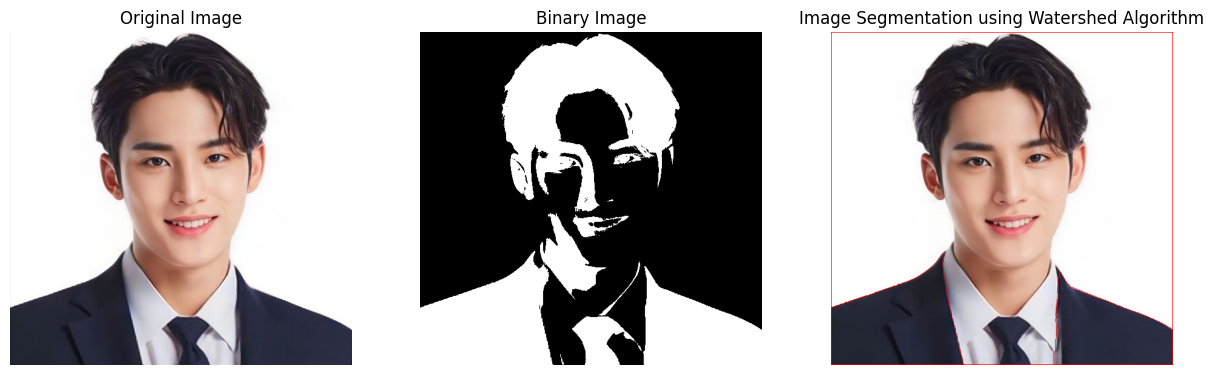

In [17]:
# Load an image.
image = cv2.imread('mingyu.jpg')
original = image.copy()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to convert the image to binary.
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

sure_fg = np.uint8(sure_fg)
unknown_region = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown_region == 255] = 0

# Apply the Watershed algorithm to segment the image into regions.
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]

# Visualize and display the segmented regions.
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Segmentation using Watershed Algorithm')
plt.axis('off')

plt.show()